In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

Iris data

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Train

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Test

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(pd.crosstab(iris.target_names[y_test], iris.target_names[y_pred], rownames=['Actual y'], colnames=['prediction']))
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

prediction  setosa  versicolor  virginica
Actual y                                 
setosa          16           0          0
versicolor       0          17          1
virginica        0           0         11
Accuracy: 0.98


Variable importance

In [ ]:
importances = clf.feature_importances_ # The impurity-based feature importances
indices = np.argsort(importances)
features = iris.feature_names

In [ ]:
for i in range(len(features)):
  print('Featture: %s - importance: %s'%(features[i], importances[i]))

Featture: sepal length (cm) - importance: 0.07456894708326965
Featture: sepal width (cm) - importance: 0.017256200675693605
Featture: petal length (cm) - importance: 0.506707300515958
Featture: petal width (cm) - importance: 0.4014675517250786


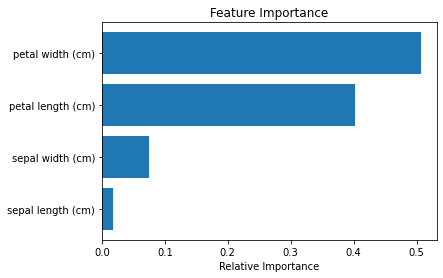

In [ ]:
plt.figure(1)
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)),features)
plt.xlabel('Relative Importance')
plt.show()

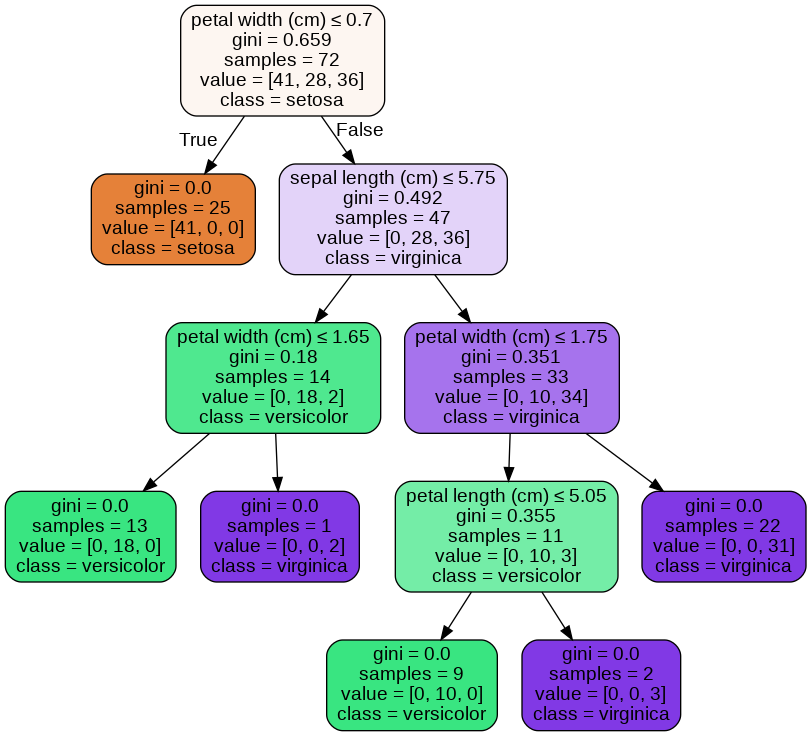

In [ ]:
tree = clf.estimators_[9]

dot_data = export_graphviz(tree, out_file=None, feature_names=iris.feature_names,
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())